In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import tensorflow as tf

In [2]:
picture_size = 32
folder_path = "images/"  
batch_size = 128
epochs = 20
no_of_classes = 7

In [12]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

def preprocess_images(folder_path, picture_size, color_mode='grayscale'):
    print(f"Preprocessing images in: {folder_path}")
    
    if not os.path.exists(folder_path):
        print(f"Error: The path {folder_path} does not exist.")
        print(f"Current working directory: {os.getcwd()}")
        print(f"Contents of current directory: {os.listdir('.')}")
        raise FileNotFoundError(f"The path {folder_path} does not exist")
    
    images = []
    labels = []
    class_names = sorted(os.listdir(folder_path))
    
    print(f"Found the following classes: {class_names}")
    

    total_images = sum(len(os.listdir(os.path.join(folder_path, class_name))) 
                       for class_name in class_names 
                       if os.path.isdir(os.path.join(folder_path, class_name)))
    

    pbar = tqdm(total=total_images, desc="Processing images")
    
    for class_name in class_names:
        class_path = os.path.join(folder_path, class_name)
        if not os.path.isdir(class_path):
            continue
        
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = load_img(img_path, target_size=(picture_size, picture_size), color_mode=color_mode)
            img_array = img_to_array(img)
            images.append(img_array)
            labels.append(class_name)
            pbar.update(1)
    
    pbar.close()
    
    print("Converting to numpy array and normalizing...")
    images = np.array(images, dtype='float32') / 255.0
    
    print("Encoding labels...")
    le = LabelEncoder()
    labels_encoded = le.fit_transform(labels)
    labels_categorical = to_categorical(labels_encoded)
    
    return images, labels_categorical, le.classes_

folder_path = "images"
picture_size = 32

train_path = os.path.join(folder_path, "train")
X_train, y_train, class_names = preprocess_images(train_path, picture_size)

val_path = os.path.join(folder_path, "validation")
X_val, y_val, _ = preprocess_images(val_path, picture_size)

print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Validation labels shape: {y_val.shape}")
print(f"Number of classes: {len(class_names)}")
print(f"Class names: {class_names}")

Preprocessing images in: images\train
Found the following classes: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


Processing images: 100%|██████████| 28821/28821 [02:53<00:00, 166.52it/s] 


Converting to numpy array and normalizing...
Encoding labels...
Preprocessing images in: images\validation
Found the following classes: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


Processing images: 100%|██████████| 7066/7066 [01:06<00:00, 106.13it/s]

Converting to numpy array and normalizing...
Encoding labels...
Training data shape: (28821, 32, 32, 1)
Training labels shape: (28821, 7)
Validation data shape: (7066, 32, 32, 1)
Validation labels shape: (7066, 7)
Number of classes: 7
Class names: ['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


In [9]:


"""
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1,
    shear_range=0.1,
    fill_mode='nearest'
)

datagen_val = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = datagen_train.flow_from_directory(
    folder_path + "train",
    target_size=(picture_size, picture_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator = datagen_val.flow_from_directory(
    folder_path + "validation",
    target_size=(picture_size, picture_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)



steps_per_epoch = len(train_generator)
validation_steps = len(validation_generator)


print(f"Number of training samples: {train_generator.n}")
print(f"Number of validation samples: {validation_generator.n}")
print(f"Number of classes: {len(train_generator.class_indices)}")
print(f"Class indices: {train_generator.class_indices}")
print(f"Batch size: {batch_size}")
print(f"Steps per epoch: {steps_per_epoch}")
print(f"Validation steps: {validation_steps}")


x_batch, y_batch = next(iter(train_generator))
print(f"Batch shape: {x_batch.shape}")
print(f"Labels shape: {y_batch.shape}")'
"""

'\ndatagen_train = ImageDataGenerator(\n    rescale=1./255,\n    rotation_range=20,\n    width_shift_range=0.1,\n    height_shift_range=0.1,\n    horizontal_flip=True,\n    zoom_range=0.1,\n    shear_range=0.1,\n    fill_mode=\'nearest\'\n)\n\ndatagen_val = ImageDataGenerator(rescale=1./255)\n\n# Create generators\ntrain_generator = datagen_train.flow_from_directory(\n    folder_path + "train",\n    target_size=(picture_size, picture_size),\n    color_mode="grayscale",\n    batch_size=batch_size,\n    class_mode=\'categorical\',\n    shuffle=True\n)\n\nvalidation_generator = datagen_val.flow_from_directory(\n    folder_path + "validation",\n    target_size=(picture_size, picture_size),\n    color_mode="grayscale",\n    batch_size=batch_size,\n    class_mode=\'categorical\',\n    shuffle=False\n)\n\n\n# Calculate steps\nsteps_per_epoch = len(train_generator)\nvalidation_steps = len(validation_generator)\n\n# Print information\nprint(f"Number of training samples: {train_generator.n}")\np

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

model = Sequential()


model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (32,32,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))


model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))



model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(learning_rate = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


C:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 512)      │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 8, 8, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 256)            │         1,02

 Total params: 3,823,367 (14.58 MB)

 Trainable params: 3,819,399 (14.57 MB)

 Non-trainable params: 3,968 (15.50 KB)

In [14]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau



early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=4,  
    verbose=1,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,  
    verbose=1,
    min_delta=0.0001,
    min_lr=1e-6  
)

callbacks_list = [early_stopping, reduce_lr]


epochs = 50  


optimizer = Adam(learning_rate=0.001)
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)


model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 512)      │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 8, 8, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 256)            │         1,02

 Total params: 3,823,367 (14.58 MB)

 Trainable params: 3,819,399 (14.57 MB)

 Non-trainable params: 3,968 (15.50 KB)

In [16]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=batch_size
)

Epoch 1/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 128s 531ms/step - accuracy: 0.2412 - loss: 1.9716 - val_accuracy: 0.2583 - val_loss: 2.4138
Epoch 2/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 134s 594ms/step - accuracy: 0.3793 - loss: 1.6051 - val_accuracy: 0.3371 - val_loss: 1.9458
Epoch 3/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 130s 575ms/step - accuracy: 0.4411 - loss: 1.4334 - val_accuracy: 0.4820 - val_loss: 1.3468
Epoch 4/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 126s 557ms/step - accuracy: 0.4882 - loss: 1.3250 - val_accuracy: 0.4762 - val_loss: 1.3213
Epoch 5/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 564s 3s/step - accuracy: 0.5182 - loss: 1.2578 - val_accuracy: 0.5270 - val_loss: 1.2451
Epoch 6/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 145s 640ms/step - accuracy: 0.5391 - loss: 1.2162 - val_accuracy: 0.5488 - val_loss: 1.1787
Epoch 7/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 146s 647ms/step - accuracy: 0.5562 - loss: 1.1631 - val_accuracy: 0.5171 - val_loss: 1.2700
Epoch 8/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 144s 638ms/step - accuracy: 0.5721 - lo

In [ ]:
history.history

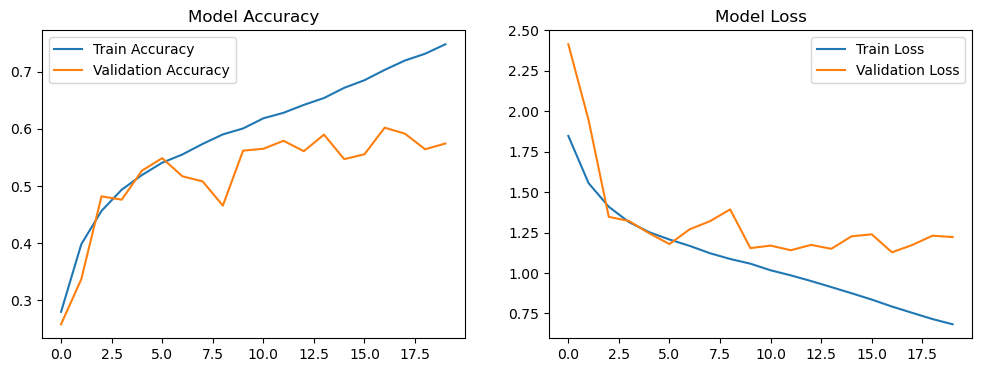

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

def create_improved_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3,3), padding='same', input_shape=input_shape, kernel_regularizer=l2(0.0001)),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.3),
        
        Conv2D(64, (3,3), padding='same', kernel_regularizer=l2(0.0001)),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.3),
        
        Conv2D(128, (3,3), padding='same', kernel_regularizer=l2(0.0001)),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.4),
        
        Flatten(),
        Dense(256, kernel_regularizer=l2(0.0001)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.5),
        
        Dense(num_classes, activation='softmax')
    ])
    
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

model_2 = create_improved_model(input_shape, num_classes)



In [20]:
history = model_2.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,  # Increase epochs, we'll use early stopping
    batch_size=32,  # Reduced batch size
    callbacks=[reduce_lr, early_stopping]
)

Epoch 1/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 36s 30ms/step - accuracy: 0.2551 - loss: 2.1237 - val_accuracy: 0.3442 - val_loss: 1.8312 - learning_rate: 0.0010
Epoch 2/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.3716 - loss: 1.6967 - val_accuracy: 0.4236 - val_loss: 1.6021 - learning_rate: 0.0010
Epoch 3/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 29s 32ms/step - accuracy: 0.4119 - loss: 1.6092 - val_accuracy: 0.4547 - val_loss: 1.5046 - learning_rate: 0.0010
Epoch 4/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 31s 34ms/step - accuracy: 0.4426 - loss: 1.5443 - val_accuracy: 0.4690 - val_loss: 1.5157 - learning_rate: 0.0010
Epoch 5/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 30s 33ms/step - accuracy: 0.4596 - loss: 1.5230 - val_accuracy: 0.4461 - val_loss: 1.5846 - learning_rate: 0.0010
Epoch 6/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 34s 37ms/step - accuracy: 0.4643 - loss: 1.5064 - val_accuracy: 0.5191 - val_loss: 1.4003 - learning_rate: 0.0010
Epoch 7/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 31s 34ms/step - accuracy: 0.4847 - l

Epoch 44/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 30s 33ms/step - accuracy: 0.5818 - loss: 1.2059 - val_accuracy: 0.5931 - val_loss: 1.1978 - learning_rate: 4.0000e-05
Epoch 45/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 30s 34ms/step - accuracy: 0.5839 - loss: 1.2040 - val_accuracy: 0.5954 - val_loss: 1.1967 - learning_rate: 4.0000e-05
Epoch 46/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 31s 35ms/step - accuracy: 0.5821 - loss: 1.2075 - val_accuracy: 0.5940 - val_loss: 1.1942 - learning_rate: 4.0000e-05
Epoch 47/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 31s 35ms/step - accuracy: 0.5882 - loss: 1.2019 - val_accuracy: 0.5933 - val_loss: 1.1951 - learning_rate: 4.0000e-05
Epoch 48/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.5819 - loss: 1.2021 - val_accuracy: 0.5934 - val_loss: 1.1942 - learning_rate: 4.0000e-05
Epoch 49/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.5858 - loss: 1.1930 - val_accuracy: 0.5916 - val_loss: 1.1952 - learning_rate: 4.0000e-05
Epoch 50/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 29s 3

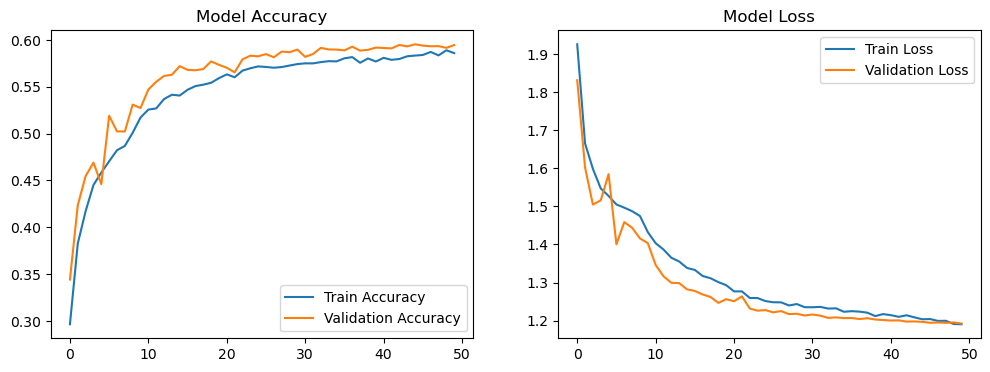

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

In [22]:
model_2.save("best_model.keras")

In [23]:
model_3 = create_improved_model(input_shape, num_classes)
model_3.summary()

C:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 32, 32, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_22 (Activation)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_23 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 620,935 (2.37 MB)

 Trainable params: 619,975 (2.37 MB)

 Non-trainable params: 960 (3.75 KB)

In [24]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)


In [26]:
history_3 = model_3.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,  #ökar epochs
    batch_size=32,  
    callbacks=[reduce_lr, early_stopping]
)

Epoch 1/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.3661 - loss: 1.7137 - val_accuracy: 0.4342 - val_loss: 1.5442 - learning_rate: 0.0010
Epoch 2/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.4050 - loss: 1.6081 - val_accuracy: 0.4307 - val_loss: 1.5815 - learning_rate: 0.0010
Epoch 3/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.4341 - loss: 1.5529 - val_accuracy: 0.4527 - val_loss: 1.5219 - learning_rate: 0.0010
Epoch 4/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.4433 - loss: 1.5368 - val_accuracy: 0.4407 - val_loss: 1.6041 - learning_rate: 0.0010
Epoch 5/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.4748 - loss: 1.4981 - val_accuracy: 0.4728 - val_loss: 1.4795 - learning_rate: 0.0010
Epoch 6/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 38s 42ms/step - accuracy: 0.4765 - loss: 1.4936 - val_accuracy: 0.4827 - val_loss: 1.4912 - learning_rate: 0.0010
Epoch 7/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 31s 35ms/step - accuracy: 0.4

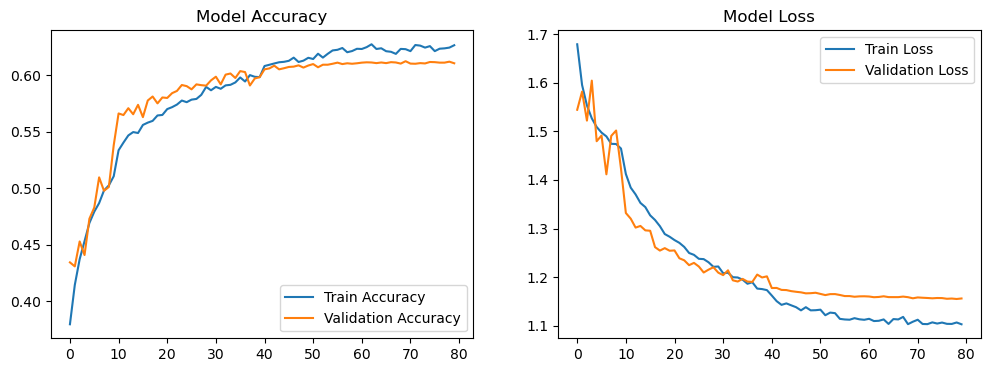

In [27]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_3.history['accuracy'], label='Train Accuracy')
plt.plot(history_3.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history_3.history['loss'], label='Train Loss')
plt.plot(history_3.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')

plt.show()